<a href="https://colab.research.google.com/github/kmouleejunhyuk/bigdata_analysist_practical/blob/main/PCA_%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#data: kaggle mushroom dataset
import pandas as pd
rawdata = pd.read_csv('https://raw.githubusercontent.com/kmouleejunhyuk/bigdata_analysist_practical/main/mushrooms.csv')

In [ ]:
#간단한 전처리
#veil 값이 단일값이기 때문에, 삭제
droped_data = rawdata.copy()
droped_data.drop(['veil-type'], axis = 1, inplace = True)

#레이블인코딩
from sklearn.preprocessing import LabelEncoder
obj_cols = [x for x in droped_data.columns if droped_data[x].dtype == 'object']
encoder = LabelEncoder()
droped_data[obj_cols] = droped_data[obj_cols].apply(lambda x: encoder.fit_transform(x))

In [ ]:
droped_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,2,1,0,7,4,2


In [ ]:
from sklearn.model_selection import train_test_split
obj_cols.remove('class')
x_train, x_test, y_train, y_test = train_test_split(droped_data.loc[:, droped_data.columns != 'class'], droped_data['class'], test_size = 0.2)
x_train.shape

(6499, 21)

In [ ]:
#pca 차원축소
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(x_train)

In [ ]:
#시각화

In [ ]:
pca_result = pd.DataFrame(pca_result, columns = ['x1', 'x2'])
y_ = pd.DataFrame(y_train.values, columns = ['y'])
pca_result = pd.concat([y_, pca_result], axis = 1)

pca_test_result = pca.transform(x_test)

In [ ]:
pca_result_test = pd.DataFrame(pca_test_result, columns = ['x1', 'x2'])
y_ = pd.DataFrame(y_test.values, columns = ['y'])
pca_result_test = pd.concat([y_, pca_result_test], axis = 1)

Text(0, 0.5, '2nd primary component')

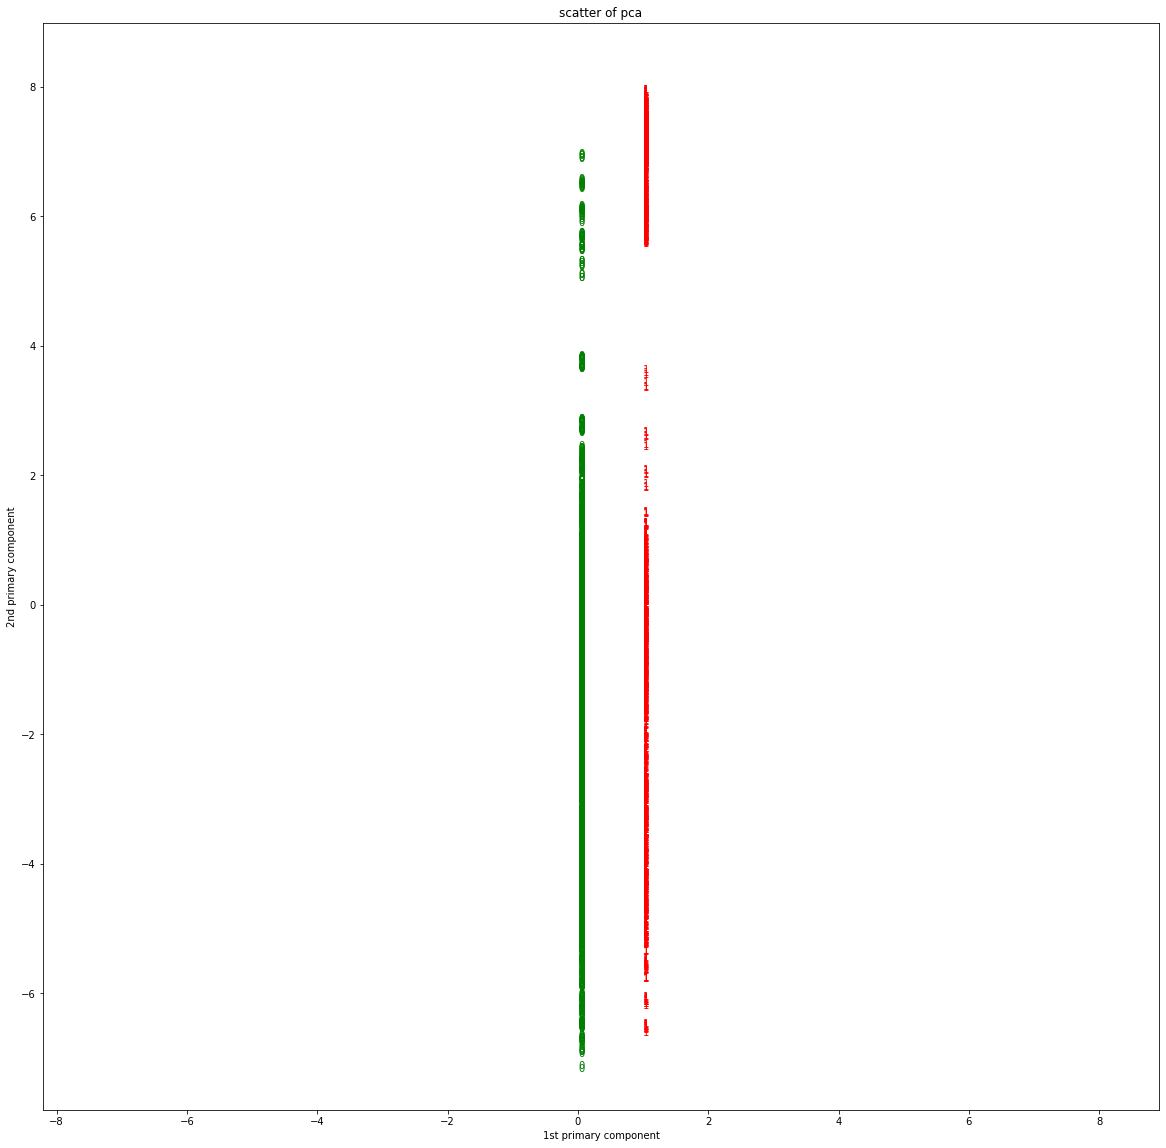

In [ ]:
#시각화
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 20))
plt.xlim(pca_result['x1'].min() - 1, pca_result['x1'].max() + 1)
plt.ylim(pca_result['x2'].min() - 1, pca_result['x2'].max() + 1)

for i in range(pca_result.shape[0]):
    if pca_result['y'][i] == 0:
        plt.text(pca_result.iloc[i, 0], pca_result.iloc[i, 1], pca_result['y'][i], color = 'g')
    else:
        plt.text(pca_result.iloc[i, 0], pca_result.iloc[i, 1], pca_result['y'][i], color = 'r')

plt.title('scatter of pca')
plt.xlabel('1st primary component')
plt.ylabel('2nd primary component')

Text(0, 0.5, '2nd primary component')

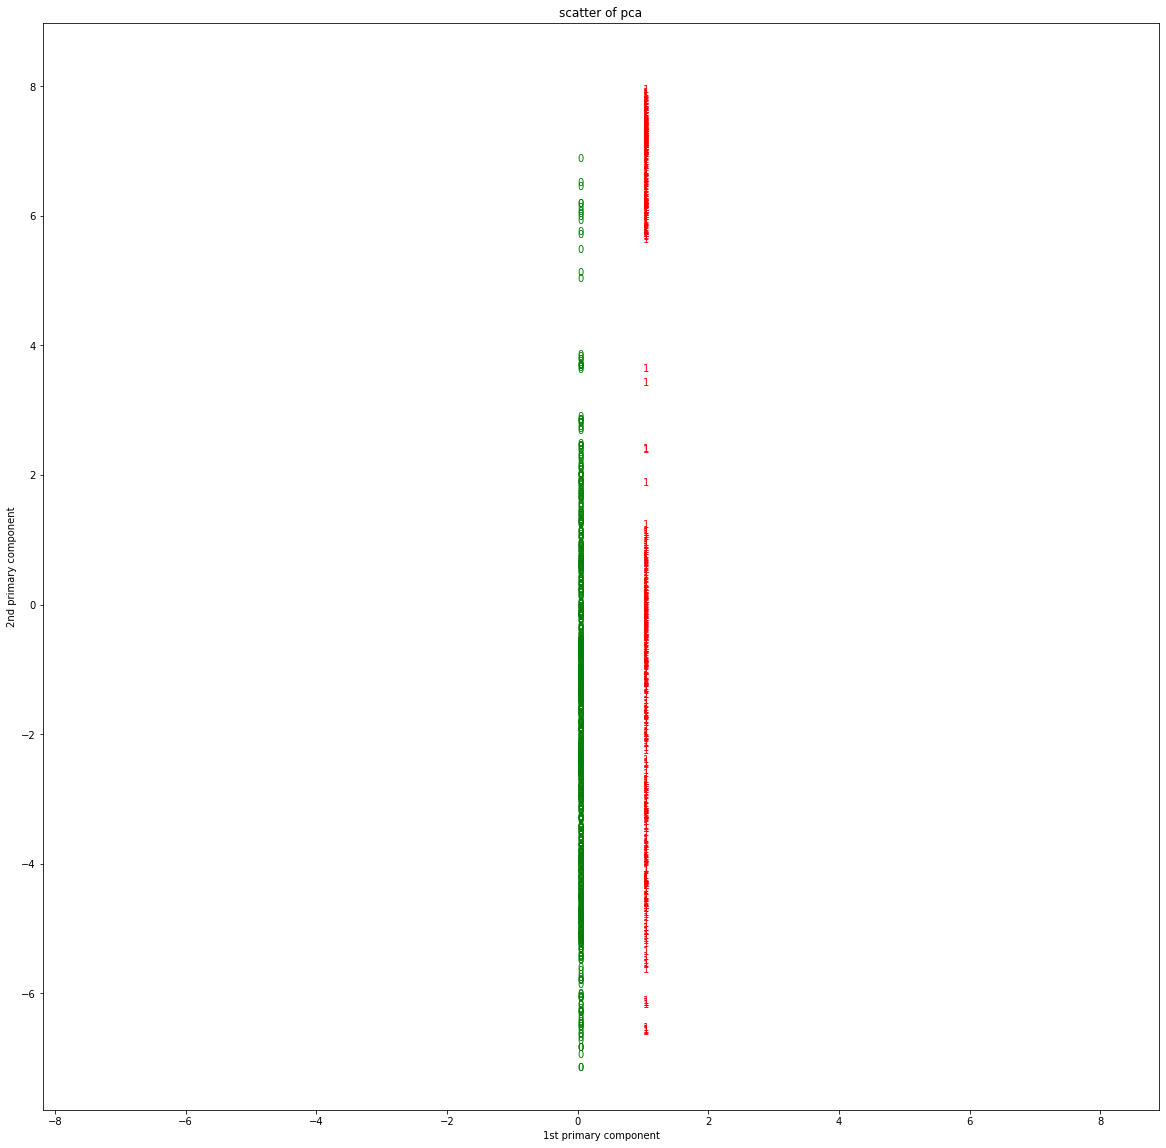

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 20))
plt.xlim(pca_result_test['x1'].min() - 1, pca_result_test['x1'].max() + 1)
plt.ylim(pca_result_test['x2'].min() - 1, pca_result_test['x2'].max() + 1)

for i in range(pca_result_test.shape[0]):
    if pca_result_test['y'][i] == 0:
        plt.text(pca_result_test.iloc[i, 0], pca_result_test.iloc[i, 1], pca_result_test['y'][i], color = 'g')
    else:
        plt.text(pca_result_test.iloc[i, 0], pca_result_test.iloc[i, 1], pca_result_test['y'][i], color = 'r')

plt.title('scatter of pca')
plt.xlabel('1st primary component')
plt.ylabel('2nd primary component')